In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
df.shape


(768, 10)

<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

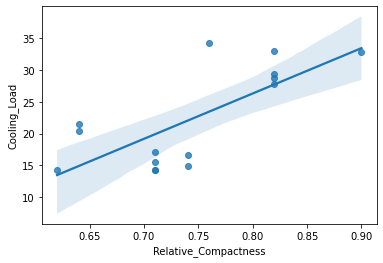

In [2]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
df = df.rename(columns=column_names)
simple_linear_reg_df = df[["Relative_Compactness", 'Cooling_Load']].sample(15, random_state=9) #the selection was 15 randomly selected observations.
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_df)  # checking for the relationship btw Relative_Compactness independent and Cooling_Load dependent


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # define min max scaler do scaling so that one significant number doesn’t impact the model just because of their large magnitude.
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) #Apply the scale to training data
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']


In [4]:
#split  dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=1)


In [5]:
print ("X_train: ", x_train)
print ("y_train: ", y_train)
print("X_test: ", x_test)
print ("y_test: ", y_test)

X_train:       Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
88               0.055556      0.916667   0.571429   1.000000             0.0   
467              0.194444      0.750000   0.285714   1.000000             0.0   
550              0.388889      0.500000   1.000000   0.111111             1.0   
147              1.000000      0.000000   0.285714   0.000000             1.0   
481              1.000000      0.000000   0.285714   0.000000             1.0   
..                    ...           ...        ...        ...             ...   
645              0.388889      0.500000   1.000000   0.111111             1.0   
715              0.055556      0.916667   0.571429   1.000000             0.0   
72               0.333333      0.583333   0.000000   1.000000             0.0   
235              0.055556      0.916667   0.571429   1.000000             0.0   
37               0.111111      0.833333   0.428571   1.000000             0.0   

     Orientation 

In [9]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit a model here Linear model to the training dataset
linear_model.fit(x_train, y_train) # use the fit() func

predicted_values = linear_model.predict(x_test) # what the model predicted 
# Evaluating the predictions
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
_mae=round(mae, 3) #prints 0.063
print ("MAE = ", _mae)

MAE =  0.063


In [13]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
_rmse=round(rmse, 3) #prints 0.089
print ("RMSE = ", _rmse)

RMSE =  0.089


In [14]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
_r2=round(r2_score, 3) #prints 0.893
print ("R2 = ", _r2)

R2 =  0.894


In [15]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [16]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [27]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

